# Jonathan Bradley CS 4319 Homework 2

# Hierarchical Clustering

In [61]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
import pandas as pd
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
%matplotlib inline

from sklearn.model_selection import train_test_split

In [66]:
data = pd.read_csv(r"C:\Users\jonat\Desktop\school\Spring 2021\CS 4319 - Machine Learning\Homework1\BDParkinson_Prediction.csv")

data.head()



,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,CLASS
0,0.624731,0.135424,0.0,0.675282,0.182203,0.962960,Class_1
1,0.647223,0.136211,0.0,0.679511,0.195903,0.987387,Class_1
2,0.706352,0.187593,0.0,0.632989,0.244884,0.991182,Class_1
3,0.680291,0.192076,0.0,0.651786,0.233528,0.991857,Class_1
4,0.660104,0.161131,0.0,0.677162,0.209531,0.991066,Class_1


In [134]:
data['CLASS'].replace({'Class2': 'Class_2'}, inplace = True)
data['CLASS'].value_counts()

Class_1    125
Class_4    125
Class_3    125
Class_2    125
Name: CLASS, dtype: int64

In [135]:
data2 = pd.DataFrame(data, columns =['VAR1','VAR2','VAR3','VAR4','VAR5','VAR6'])

features = data.columns[:6]
label = data.columns[-1]

X = data[features]
Y = data[label]

X_train, X_test, y_train, y_test = train_test_split(X,Y)

# WARD LINKAGE

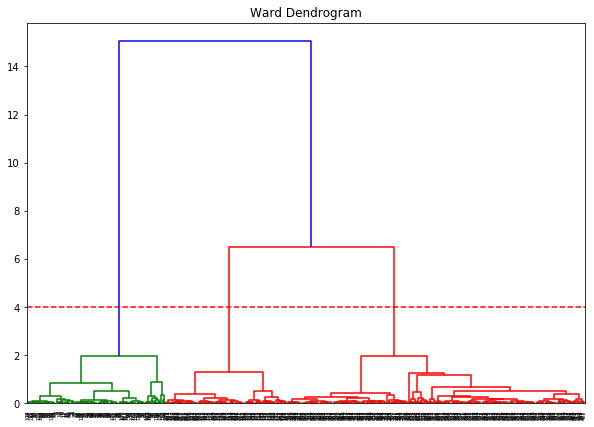

In [71]:
plt.figure(figsize=(10, 7))  
plt.title("Ward Dendrogram")  
dend = shc.dendrogram(shc.linkage(data2, method='ward'))
plt.axhline(y=4, color='r', linestyle='--')

# SINGLE

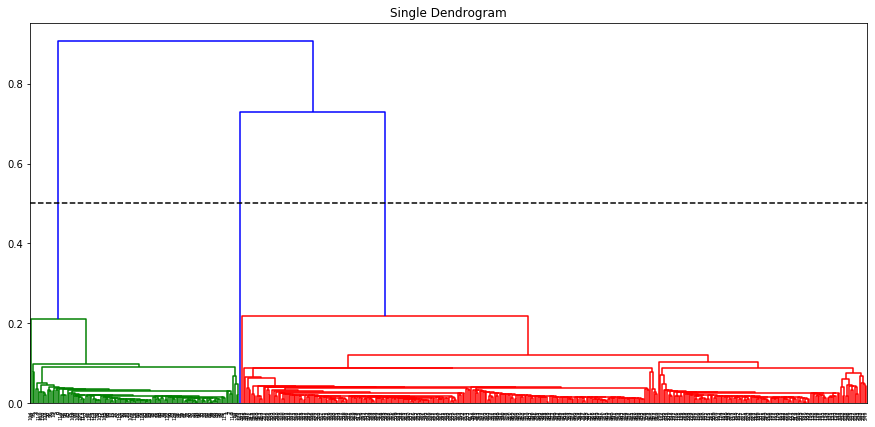

In [27]:
plt.figure(figsize=(15, 7))  
plt.title("Single Dendrogram")  
dend = shc.dendrogram(shc.linkage(data2, method='single'))
plt.axhline(y=.5, color='k', linestyle='--')

# AVERAGE

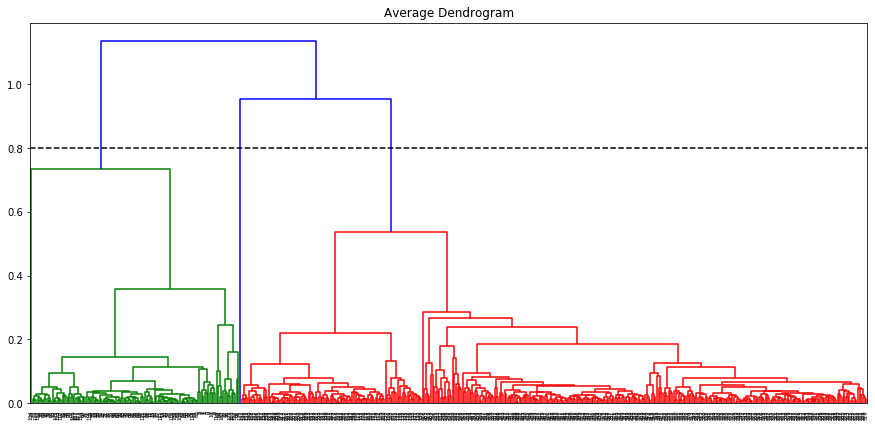

In [150]:
plt.figure(figsize=(15, 7))  
plt.title("Average Dendrogram")  
dend = shc.dendrogram(shc.linkage(data2, method='average'))
plt.axhline(y=.8, color='k', linestyle='--')

# Maximum Linkage

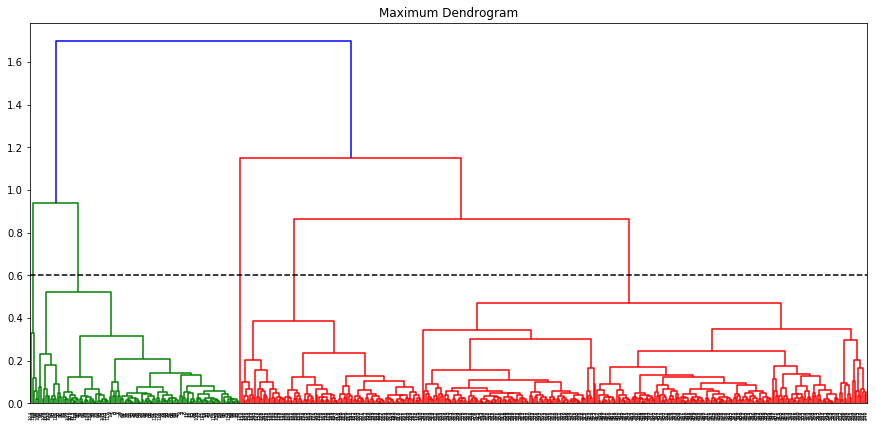

In [149]:
plt.figure(figsize=(15, 7))  
plt.title("Maximum Dendrogram")  
dend = shc.dendrogram(shc.linkage(data2, method='complete'))
plt.axhline(y=.6, color='k', linestyle='--')

# Decision Tree

In [105]:
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(X,Y, random_state = 1)

In [165]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [166]:
print(f'Decision tree has {tree.tree_.node_count} nodes with maximum depth {tree.tree_.max_depth}.')
print(f'Accuracy: {tree.score(X,Y)}')

Decision tree has 15 nodes with maximum depth 4.
Accuracy: 0.996


In [167]:
y_pred = tree.predict(X_test)

In [168]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[42  0  0  0]
 [ 0 32  0  0]
 [ 0  0 27  2]
 [ 0  0  0 22]]
              precision    recall  f1-score   support

     Class_1       1.00      1.00      1.00        42
     Class_2       1.00      1.00      1.00        32
     Class_3       1.00      0.93      0.96        29
     Class_4       0.92      1.00      0.96        22

    accuracy                           0.98       125
   macro avg       0.98      0.98      0.98       125
weighted avg       0.99      0.98      0.98       125



The decision tree model has a 99% accuracy rate.

# Optimized Decision Tree

In [169]:
from sklearn.model_selection import GridSearchCV


In [170]:
param_grid = {'max_depth': [2,3,4,5,6,7], 'min_samples_leaf': [2,20,50,70],
              'max_leaf_nodes': [5,9,15,21,27]}
GS_dt = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 5, n_jobs = -1)
GS_dt.fit(X_train, y_train)

C:\Users\jonat\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7],
                         'max_leaf_nodes': [5, 9, 15, 21, 27],
                 

In [171]:
GS_dt.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=9,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [172]:
treeOpt = GS_dt.best_estimator_
#print(confusion_matrix(y_test, y_pred))
#print(classification_report(y_test, y_pred))

In [173]:
print(f'Decision tree has {treeOpt.tree_.node_count} nodes with maximum depth {treeOpt.tree_.max_depth}.')
print(f'Accuracy: {treeOpt.score(X,Y)}')

Decision tree has 15 nodes with maximum depth 4.
Accuracy: 0.994


# Random Forest Classifier

In [174]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier()
RFC.fit(X_train, y_train)
print(classification_report(y_test, RFC.predict(X_test)))

              precision    recall  f1-score   support

     Class_1       1.00      1.00      1.00        42
     Class_2       1.00      1.00      1.00        32
     Class_3       1.00      1.00      1.00        29
     Class_4       1.00      1.00      1.00        22

    accuracy                           1.00       125
   macro avg       1.00      1.00      1.00       125
weighted avg       1.00      1.00      1.00       125



C:\Users\jonat\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


The Random Forest Classifier Model has a 95% accuracy.

In [178]:
print(f'Random Frest has {RFC.n_estimators} trees with maximum depth {RFC.max_depth}.')
print(f'Accuracy: {RFC.score(X,Y)}')

Random Frest has 10 trees with maximum depth None.
Accuracy: 1.0


In [129]:
y_pred = RFC.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Class2       0.96      1.00      0.98        27
     Class_1       1.00      1.00      1.00        27
     Class_3       0.89      0.94      0.92        36
     Class_4       0.97      0.89      0.93        35

    accuracy                           0.95       125
   macro avg       0.96      0.96      0.96       125
weighted avg       0.95      0.95      0.95       125



# Optimized Random Forest

In [179]:
#grid_param = {'n_estimators':[100,200,300,400,500],
              'criterion': ['gini','entropy'],
              'bootstrap': [True, False]}

In [156]:
#gd_RFC = GridSearchCV(estimator=RFC,
                     param_grid=grid_param,
                     scoring='accuracy',
                     cv=5,
                     n_jobs=-1)
#gd_RFC.fit(X_train, y_train)


In [180]:
param_grid = {'max_features': [1,2,3,4,5],
              'n_estimators': [1,2,3,5,7,10],
              'min_samples_leaf':[10,20,30,45,50,60]}
gs_RFC = GridSearchCV(RandomForestClassifier(),param_grid,cv=5,n_jobs =-1)
gs_RFC.fit(X_train, y_train)

C:\Users\jonat\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [183]:
gs_RFC.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=3, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=20, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [184]:
RFCOpt = gs_RFC.best_estimator_
y_pred = RFCOpt.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     Class_1       1.00      1.00      1.00        42
     Class_2       1.00      1.00      1.00        32
     Class_3       0.97      1.00      0.98        29
     Class_4       1.00      0.95      0.98        22

    accuracy                           0.99       125
   macro avg       0.99      0.99      0.99       125
weighted avg       0.99      0.99      0.99       125



In [185]:
print(f'Random Frest has {RFCOpt.n_estimators} trees with maximum depth {RFCOpt.max_depth}.')
print(f'Accuracy: {RFCOpt.score(X,Y)}')

Random Frest has 10 trees with maximum depth None.
Accuracy: 0.972
